In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Required Libraries
!pip install imbalanced-learn
!pip install streamlit
!pip install pyngrok

<h1>Import dataset</h1>

In [6]:
Fulldf = pd.read_csv(r'C:\Users\laksh\Downloads\projct1\Train_Dataset.csv')

In [14]:
Fulldf.sample(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
107844,12103064,13500,0.0,1.0,0.0,1.0,0.0,45000.0,2454.3,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.449978,NaN,0.1608,179.0,NaN,0
90889,12218557,6750,0.0,0.0,1.0,1.0,0.0,31500.0,2538.45,Relative,...,Yes,Yes,Industry: type 3,NaN,0.311567,0.598926,NaN,0.0,0.0,0
109617,12127194,13500,0.0,1.0,1.0,0.0,2.0,134550.0,NaN,Alone,...,Yes,Yes,Other,0.603943,0.718013,0.643026,0.0722,0.0,0.0,0
84122,12141290,18000,1.0,1.0,1.0,1.0,0.0,84941.55,3754.35,Alone,...,Yes,Yes,Police,0.599806,0.363416,0.389339,0.1309,3413.0,2.0,0
60416,12126069,18000.0,1.0,1.0,1.0,1.0,2.0,72778.5,NaN,Alone,...,Yes,Yes,School,0.555443,0.611657,0.49206,NaN,2767.0,2.0,0


In [12]:
print(Fulldf.dtypes)

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

<h2>Null percentage</h2>

In [16]:
per_miss = Fulldf.isnull().sum()/Fulldf.shape[0] * 100
np.round(per_miss, decimals=2)

ID                             0.00
Client_Income                  2.96
Car_Owned                      2.94
Bike_Owned                     2.97
Active_Loan                    2.98
House_Own                      3.00
Child_Count                    2.99
Credit_Amount                  2.98
Loan_Annuity                   3.95
Accompany_Client               1.43
Client_Income_Type             3.04
Client_Education               2.99
Client_Marital_Status          2.85
Client_Gender                  1.98
Loan_Contract_Type             3.00
Client_Housing_Type            3.03
Population_Region_Relative     3.99
Age_Days                       2.95
Employed_Days                  2.99
Registration_Days              2.97
ID_Days                        4.90
Own_House_Age                 65.73
Mobile_Tag                     0.00
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.00
Client_Family_Members          1.98
Cleint_City_Rating          

In [33]:
# Count null values in each column
null_value_counts = df.isnull().sum()

# Display the counts of null values
null_value_counts

Client_Income                 3620
Car_Owned                     3572
Bike_Owned                    3618
Active_Loan                   3630
House_Own                     3657
Child_Count                   3635
Credit_Amount                 3634
Loan_Annuity                  4821
Client_Income_Type            3694
Client_Education              3640
Client_Marital_Status         3472
Client_Gender                 2410
Loan_Contract_Type            3644
Age_Days                      3610
Employed_Days                 3660
Registration_Days             3626
ID_Days                       5970
Client_Family_Members         2409
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Default                          0
dtype: int64

<h2>Convert columns to numeric</h2>

In [18]:
# List of columns that need to be converted to numeric
columns_to_convert = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative',
    'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Score_Source_3'
]

# Convert columns to numeric and coerce errors to NaN
for col in columns_to_convert:
    Fulldf[col] = pd.to_numeric(Fulldf[col], errors='coerce')

# Display the updated data types
print(Fulldf.dtypes)


ID                              int64
Client_Income                 float64
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

<h2>Drop columns</h2>

In [20]:
#list of columns which droped

df = Fulldf.drop(columns=['ID','Score_Source_1','Social_Circle_Default','Score_Source_2','Score_Source_3','Credit_Bureau','Accompany_Client','Population_Region_Relative'
,'Own_House_Age','Mobile_Tag','Client_Housing_Type','Client_Occupation','Homephone_Tag','Workphone_Working','Cleint_City_Rating','Application_Process_Day','Application_Process_Hour','Type_Organization','Phone_Change'])

In [26]:
print(df.columns)

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Client_Income_Type',
       'Client_Education', 'Client_Marital_Status', 'Client_Gender',
       'Loan_Contract_Type', 'Age_Days', 'Employed_Days', 'Registration_Days',
       'ID_Days', 'Client_Family_Members', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Default'],
      dtype='object')


<h2>Remove Duplicates</h2>

In [29]:
# Count the number of duplicate rows across all columns
duplicate_count_all = df.duplicated(keep='first').sum()

print(f"Number of duplicate rows based on all columns: {duplicate_count_all}")

Number of duplicate rows based on all columns: 5050


In [31]:
# Drop duplicate rows while keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Count the number of duplicate rows after dropping
duplicate_count_after = df.duplicated(keep='first').sum()

print(f"Number of duplicate rows after dropping: {duplicate_count_after}")

Number of duplicate rows after dropping: 0


<h2>Check data misses</h2>

In [36]:
# Check for numerical values in categorical columns and categorical values in numerical columns

# Define categorical and numerical columns based on the DataFrame
categorical_columns = df.select_dtypes(include='object').columns
numerical_columns = df.select_dtypes(exclude='object').columns

# Check categorical columns for numerical values
categorical_numerical_values = {col: df[col].str.isnumeric().sum() for col in categorical_columns}

# Check numerical columns for categorical values
numerical_categorical_values = {
    col: df[col][~df[col].apply(lambda x: isinstance(x, (int, float)))].count()
    for col in numerical_columns
}

categorical_numerical_values, numerical_categorical_values


({'Client_Income_Type': 0,
  'Client_Education': 0,
  'Client_Marital_Status': 0,
  'Client_Gender': 0,
  'Loan_Contract_Type': 0,
  'Client_Permanent_Match_Tag': 0,
  'Client_Contact_Work_Tag': 0},
 {'Client_Income': 0,
  'Car_Owned': 0,
  'Bike_Owned': 0,
  'Active_Loan': 0,
  'House_Own': 0,
  'Child_Count': 0,
  'Credit_Amount': 0,
  'Loan_Annuity': 0,
  'Age_Days': 0,
  'Employed_Days': 0,
  'Registration_Days': 0,
  'ID_Days': 0,
  'Client_Family_Members': 0,
  'Default': 0})

<h1>Remove Unwanted </h1>

<h2>check simbols and unneccassery caractors</h2>

In [39]:
# Function to check for special characters in each column of the DataFrame
def check_special_characters(df):
    special_chars = r'[@#$]'
    special_char_counts = {}

    for col in df.columns:
        # Count the occurrences of special characters in the column
        count = df[col].astype(str).str.contains(special_chars).sum()
        special_char_counts[col] = count

    return special_char_counts

# Check for special characters in each column
special_character_counts = check_special_characters(df)

special_character_counts


{'Client_Income': 0,
 'Car_Owned': 0,
 'Bike_Owned': 0,
 'Active_Loan': 0,
 'House_Own': 0,
 'Child_Count': 0,
 'Credit_Amount': 0,
 'Loan_Annuity': 0,
 'Client_Income_Type': 0,
 'Client_Education': 0,
 'Client_Marital_Status': 0,
 'Client_Gender': 0,
 'Loan_Contract_Type': 0,
 'Age_Days': 0,
 'Employed_Days': 0,
 'Registration_Days': 0,
 'ID_Days': 0,
 'Client_Family_Members': 0,
 'Client_Permanent_Match_Tag': 0,
 'Client_Contact_Work_Tag': 0,
 'Default': 0}

In [41]:
# Drop all rows with NaN values
df_cleaned = df.dropna()

# Display the shape of the cleaned DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Original DataFrame shape: (116806, 21)
Cleaned DataFrame shape: (65005, 21)


<h2>remove XNA</h2>

In [ ]:
# Check for NaN values
nan_counts = df.isna().sum()

# Check for XNA values
xna_counts = (df == 'XNA').sum()

# Combine results into a single DataFrame for easier viewing
nan_xna_counts = pd.DataFrame({'NaN Count': nan_counts, 'XNA Count': xna_counts})

print(nan_xna_counts)

In [45]:
# Drop all rows with NaN or XNA values
df_cleaned = df.dropna().loc[~df.isin(['XNA']).any(axis=1)]

# Display the shape of the cleaned DataFrame
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

Cleaned DataFrame shape: (65003, 21)


In [47]:
# Check for NaN values
nan_counts = df.isna().sum()

# Check for XNA values
xna_counts = (df == 'XNA').sum()

# Combine results into a single DataFrame for easier viewing
nan_xna_counts = pd.DataFrame({'NaN Count': nan_counts, 'XNA Count': xna_counts})

print(nan_xna_counts)

                            NaN Count  XNA Count
Client_Income                    3620          0
Car_Owned                        3572          0
Bike_Owned                       3618          0
Active_Loan                      3630          0
House_Own                        3657          0
Child_Count                      3635          0
Credit_Amount                    3634          0
Loan_Annuity                     4821          0
Client_Income_Type               3694          0
Client_Education                 3640          0
Client_Marital_Status            3472          0
Client_Gender                    2410          3
Loan_Contract_Type               3644          0
Age_Days                         3610          0
Employed_Days                    3660          0
Registration_Days                3626          0
ID_Days                          5970          0
Client_Family_Members            2409          0
Client_Permanent_Match_Tag          0          0
Client_Contact_Work_

In [49]:
import re

# Replace 'XNA' with NaN
df = df.replace('XNA', pd.NA)

# Drop rows where any column has NaN values
df = df.dropna()


# 2. Function to remove special characters except for string words
def remove_special_chars(text):
    if isinstance(text, str):
        # Replace special characters (@, #, $, etc.) with an empty string
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

# Apply the function to all string columns
df = df.applymap(remove_special_chars)

df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Commercial,Secondary,...,Male,CL,13957.0,1062.0,6123.0,383.0,2.0,Yes,Yes,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Commercial,Secondary,...,Female,CL,11366.0,2977.0,5516.0,4043.0,4.0,Yes,Yes,0
5,11250.0,0.0,1.0,1.0,1.0,1.0,13752.00,653.85,Service,Secondary,...,Female,CL,13881.0,1184.0,3910.0,3910.0,2.0,Yes,Yes,0
6,15750.0,1.0,1.0,0.0,1.0,0.0,128835.00,3779.55,Retired,Secondary,...,Male,CL,21323.0,365243.0,113.0,4855.0,1.0,Yes,Yes,0
7,13500.0,0.0,0.0,1.0,1.0,0.0,60415.20,3097.80,Retired,Secondary,...,Male,CL,22493.0,365243.0,12617.0,5280.0,2.0,Yes,Yes,0


In [55]:
# Check for NaN values
nan_counts = df.isna().sum()

# Check for XNA values
xna_counts = (df == 'XNA').sum()

# Combine results into a single DataFrame for easier viewing
nan_xna_counts = pd.DataFrame({'NaN Count': nan_counts, 'XNA Count': xna_counts})

print(nan_xna_counts)

                            NaN Count  XNA Count
Client_Income                       0          0
Car_Owned                           0          0
Bike_Owned                          0          0
Active_Loan                         0          0
House_Own                           0          0
Child_Count                         0          0
Credit_Amount                       0          0
Loan_Annuity                        0          0
Client_Income_Type                  0          0
Client_Education                    0          0
Client_Marital_Status               0          0
Client_Gender                       0          0
Loan_Contract_Type                  0          0
Age_Days                            0          0
Employed_Days                       0          0
Registration_Days                   0          0
ID_Days                             0          0
Client_Family_Members               0          0
Client_Permanent_Match_Tag          0          0
Client_Contact_Work_

In [53]:
import re

# Alternatively, if you want to fill NaN values with a placeholder, use:
# df = df.fillna('')

# 2. Function to remove special characters except for string words
def remove_special_chars(text):
    if isinstance(text, str):
        # Replace special characters (@, #, $, etc.) with an empty string
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

# Apply the function to all string columns
df_cleaned = df_cleaned.applymap(remove_special_chars)

# Now the DataFrame has no NaN values and no special characters in string columns

In [57]:
# Check for NaN values
nan_counts = df.isna().sum()

# Check for XNA values
xna_counts = (df == 'XNA').sum()

# Combine results into a single DataFrame for easier viewing
nan_xna_counts = pd.DataFrame({'NaN Count': nan_counts, 'XNA Count': xna_counts})

print(nan_xna_counts)

                            NaN Count  XNA Count
Client_Income                       0          0
Car_Owned                           0          0
Bike_Owned                          0          0
Active_Loan                         0          0
House_Own                           0          0
Child_Count                         0          0
Credit_Amount                       0          0
Loan_Annuity                        0          0
Client_Income_Type                  0          0
Client_Education                    0          0
Client_Marital_Status               0          0
Client_Gender                       0          0
Loan_Contract_Type                  0          0
Age_Days                            0          0
Employed_Days                       0          0
Registration_Days                   0          0
ID_Days                             0          0
Client_Family_Members               0          0
Client_Permanent_Match_Tag          0          0
Client_Contact_Work_

In [59]:
#Remove any remaining rows that now contain NaN
df_cleaned = df_cleaned.dropna()

<h1>Encode data set</h1>

In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

columns_to_encode = [
   'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own','Client_Income_Type','Client_Education', 'Client_Marital_Status', 'Client_Gender','Loan_Contract_Type',
    'Client_Permanent_Match_Tag','Client_Contact_Work_Tag'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Display the encoded DataFrame
print(df.head())


   Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0         6750.0          0           0            1          0          0.0   
4        33750.0          1           0            1          0          2.0   
5        11250.0          0           1            1          1          1.0   
6        15750.0          1           1            0          1          0.0   
7        13500.0          0           0            1          1          0.0   

   Credit_Amount  Loan_Annuity  Client_Income_Type  Client_Education  ...  \
0       61190.55       3416.85                   1                 4  ...   
4      133988.40       3547.35                   1                 4  ...   
5       13752.00        653.85                   5                 4  ...   
6      128835.00       3779.55                   4                 4  ...   
7       60415.20       3097.80                   4                 4  ...   

   Client_Gender  Loan_Contract_Type  Age_Days  Employed

In [64]:
print(df.columns)
df.shape

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Client_Income_Type',
       'Client_Education', 'Client_Marital_Status', 'Client_Gender',
       'Loan_Contract_Type', 'Age_Days', 'Employed_Days', 'Registration_Days',
       'ID_Days', 'Client_Family_Members', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Default'],
      dtype='object')


(65003, 21)

In [66]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,...,Client_Gender,Loan_Contract_Type,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Family_Members,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Default
0,6750.0,0,0,1,0,0.0,61190.55,3416.85,1,4,...,1,0,13957.0,1062.0,6123.0,383.0,2.0,1,1,0
4,33750.0,1,0,1,0,2.0,133988.40,3547.35,1,4,...,0,0,11366.0,2977.0,5516.0,4043.0,4.0,1,1,0
5,11250.0,0,1,1,1,1.0,13752.00,653.85,5,4,...,0,0,13881.0,1184.0,3910.0,3910.0,2.0,1,1,0
6,15750.0,1,1,0,1,0.0,128835.00,3779.55,4,4,...,1,0,21323.0,365243.0,113.0,4855.0,1.0,1,1,0
7,13500.0,0,0,1,1,0.0,60415.20,3097.80,4,4,...,1,0,22493.0,365243.0,12617.0,5280.0,2.0,1,1,0


<h3>Check class distribution</h3>

In [69]:
class_counts = df['Default'].value_counts()
print(class_counts)

Default
0    59725
1     5278
Name: count, dtype: int64


In [71]:
#Check client income
print(df['Client_Income'].dtype)
df = df.dropna(subset=['Client_Income'])  # To drop rows with NaN values in 'Client_Income'
max_income = df['Client_Income'].max()
min_income = df['Client_Income'].min()

print(f"Max Income: {max_income}")
print(f"Min Income: {min_income}")


float64
Max Income: 1800009.0
Min Income: 2565.0


<h2>Convert days to years</h2>

In [74]:
# Convert columns to numeric, forcing errors to NaN
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')
df['ID_Days'] = pd.to_numeric(df['ID_Days'], errors='coerce')
df['Registration_years'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

# Convert days to months
df['Age_Years'] = df['Age_Days'] / 365
df['Employed_Years'] = df['Employed_Days'] / 365
df['ID_years'] = df['ID_Days'] / 365
df['Registration_years'] = df['Registration_Days'] / 365

# Drop rows with NaN values in the specified columns
df = df.dropna(subset=['Age_Years', 'Employed_Years', 'ID_years' , 'Registration_years'])

# Print the updated DataFrame
print(df[['Age_Years', 'Employed_Years', 'ID_years', 'Registration_years']])

        Age_Years  Employed_Years   ID_years  Registration_years
0       38.238356        2.909589   1.049315           16.775342
4       31.139726        8.156164  11.076712           15.112329
5       38.030137        3.243836  10.712329           10.712329
6       58.419178     1000.665753  13.301370            0.309589
7       61.624658     1000.665753  14.465753           34.567123
...           ...             ...        ...                 ...
121849  25.216438        2.090411   5.134247           10.336986
121852  23.693151        1.742466   3.312329            2.471233
121853  25.073973        4.446575   0.967123           10.904110
121854  28.191781        2.320548   7.950685            2.452055
121855  40.471233        1.364384  13.767123           23.778082

[65003 rows x 4 columns]


In [76]:
max_Age_year = df['Age_Years'].max()
min_Age_year= df['Age_Years'].min()

print(f"max_Age_year: {max_Age_year}")
print(f"min_Age_year: {min_Age_year}")

max_Age_year: 69.03287671232877
min_Age_year: 21.03013698630137


In [78]:
df.columns.tolist()

['Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Client_Gender',
 'Loan_Contract_Type',
 'Age_Days',
 'Employed_Days',
 'Registration_Days',
 'ID_Days',
 'Client_Family_Members',
 'Client_Permanent_Match_Tag',
 'Client_Contact_Work_Tag',
 'Default',
 'Registration_years',
 'Age_Years',
 'Employed_Years',
 'ID_years']

In [87]:
# Drop the original 'Age_Days' and 'Employed_Days' columns if no longer needed
df = df.drop(columns=['ID_Days','Age_Days', 'Employed_Days','Registration_Days'])

KeyError: "['ID_Days', 'Age_Days', 'Employed_Days', 'Registration_Days'] not found in axis"

<h2>Remove Outliers</h2>

Boxplots before removing outliers:


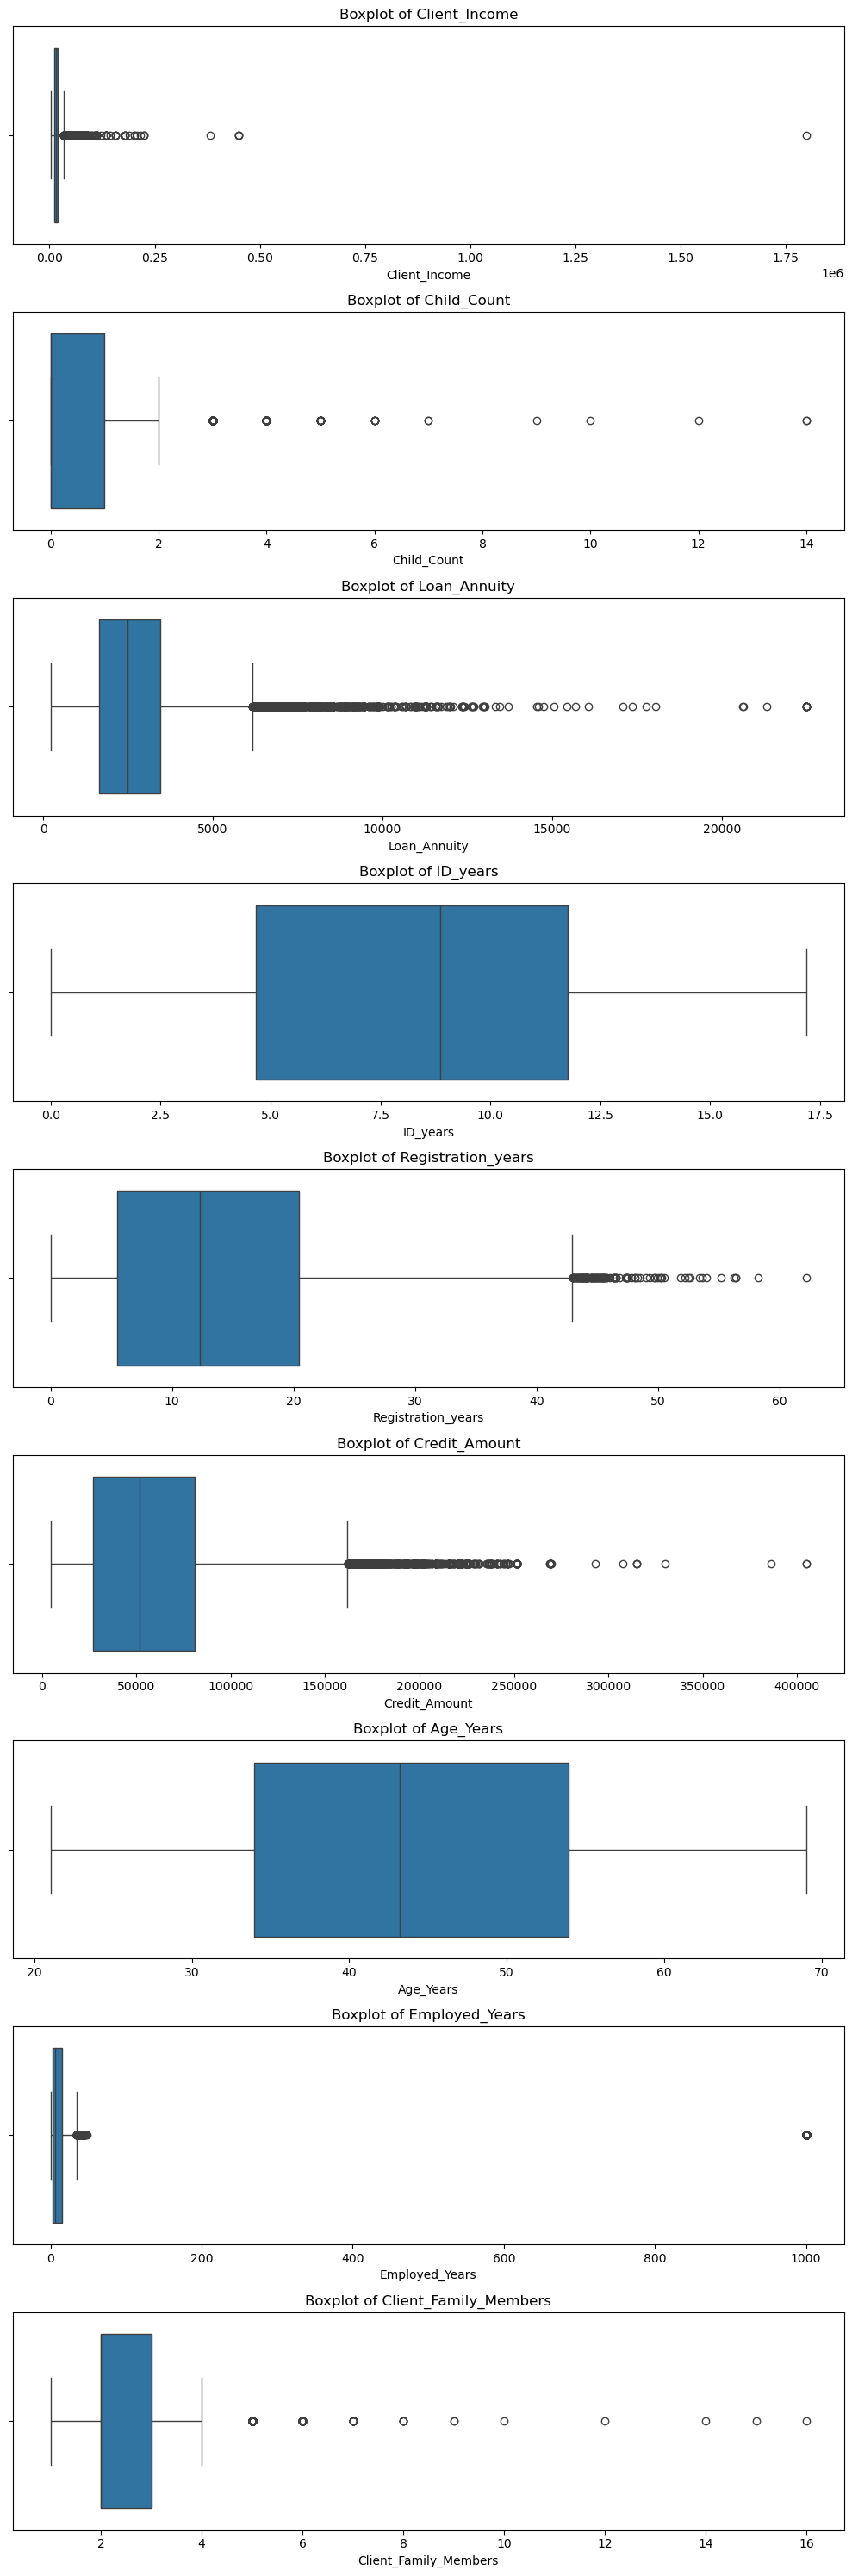

Boxplots after removing outliers:


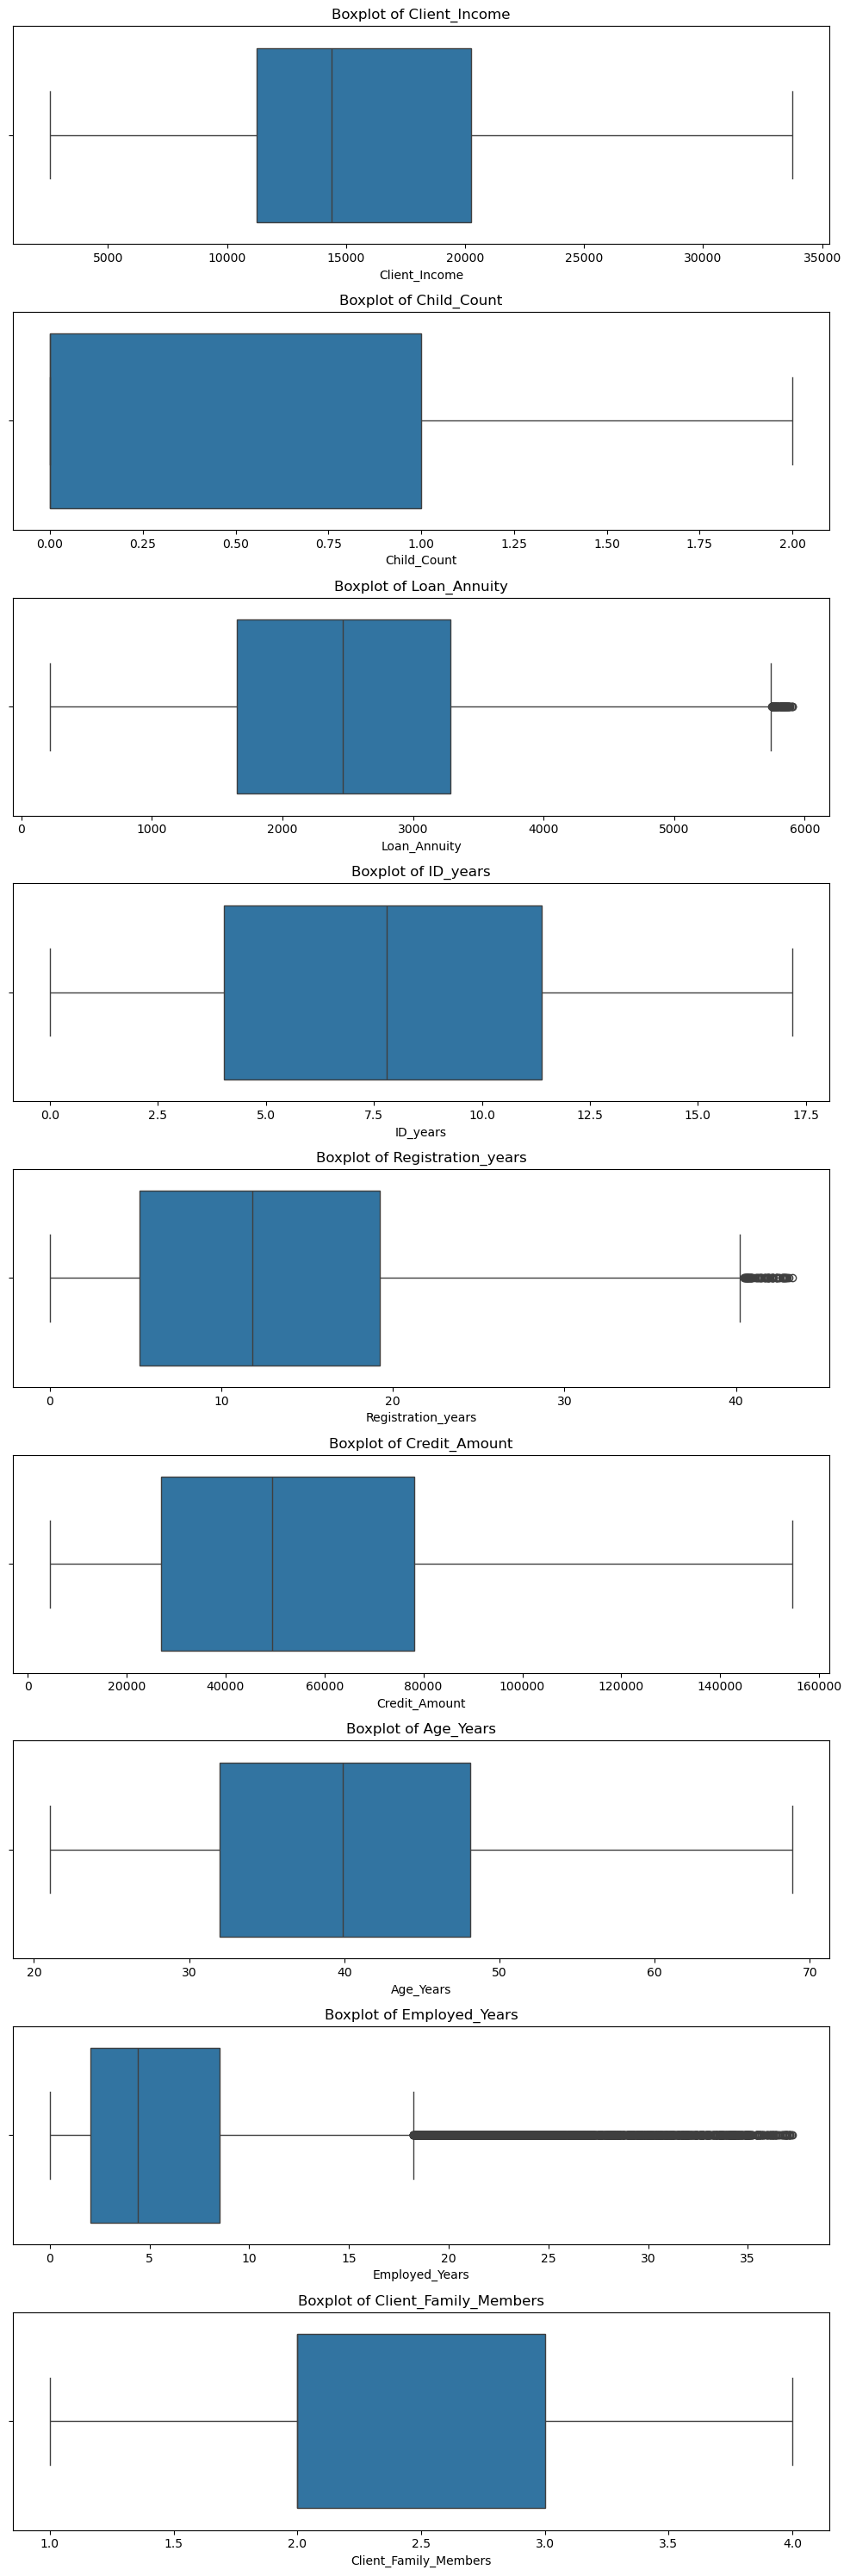

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check for outliers
columns_to_check = ['Client_Income', 'Child_Count','Loan_Annuity','ID_years','Registration_years', 'Credit_Amount', 'Age_Years', 'Employed_Years', 'Client_Family_Members']

# Convert columns to numeric (in case some are of object type)
df[columns_to_check] = df[columns_to_check].apply(pd.to_numeric, errors='coerce')

# Function to detect and remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Plot function for boxplot
def plot_boxplots(df, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(10, 30))
    for i, col in enumerate(columns):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Visualize before removing outliers
print("Boxplots before removing outliers:")
plot_boxplots(df, columns_to_check)

# Remove outliers for each column
for col in columns_to_check:
    df = remove_outliers(df, col)

# Visualize after removing outliers
print("Boxplots after removing outliers:")
plot_boxplots(df, columns_to_check)

In [83]:
class_counts = df['Default'].value_counts()
print(class_counts)

Default
0    43526
1     4330
Name: count, dtype: int64


In [89]:
# Adjust pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(df)


        Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0              6750.0          0           0            1          0   
4             33750.0          1           0            1          0   
5             11250.0          0           1            1          1   
10            27000.0          0           0            1          1   
11            15750.0          0           0            0          0   
...               ...        ...         ...          ...        ...   
121848        18000.0          1           1            0          0   
121849        10350.0          0           1            0          0   
121852        15750.0          0           1            1          0   
121853         8100.0          0           1            0          1   
121855         9000.0          1           1            1          1   

        Child_Count  Credit_Amount  Loan_Annuity  Client_Income_Type  \
0               0.0       61190.55       3416.85               

In [93]:
df.columns = df.columns.str.strip()
df.shape

(47856, 21)

<h2>Check final dataset</h2>

In [95]:
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1,
                        keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})

print ("Null Values in each column:\n",
       missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                    column name  Total missing  Percent missing
0                Client_Income              0              0.0
11                   Car_Owned              0              0.0
19                  Bike_Owned              0              0.0
18                 Active_Loan              0              0.0
17                   House_Own              0              0.0
16                 Child_Count              0              0.0
15               Credit_Amount              0              0.0
14                Loan_Annuity              0              0.0
13          Client_Income_Type              0              0.0
12            Client_Education              0              0.0
10       Client_Marital_Status              0              0.0
1                Client_Gender              0              0.0
9           Loan_Contract_Type              0              0.0
8        Client_Family_Members              0              0.0
7   Client_Permanent_Match

In [97]:
# 1. Count the number of duplicate rows across all columns
duplicate_count_all = df.duplicated(keep='first').sum()

# 2. Display the duplicate rows
duplicates = df[df.duplicated(keep='first')]
print(f"Number of duplicate rows: {duplicate_count_all}")
print("Duplicate rows:")
print(duplicates)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Client_Income, Car_Owned, Bike_Owned, Active_Loan, House_Own, Child_Count, Credit_Amount, Loan_Annuity, Client_Income_Type, Client_Education, Client_Marital_Status, Client_Gender, Loan_Contract_Type, Client_Family_Members, Client_Permanent_Match_Tag, Client_Contact_Work_Tag, Default, Registration_years, Age_Years, Employed_Years, ID_years]
Index: []


<h2>Save data set</h2> 

In [101]:
# Save the DataFrame to a CSV file
csv_filename = 'final_cleaned_data.csv'
df.to_csv(csv_filename, index=False)

print(f"DataFrame saved to {csv_filename}")

DataFrame saved to final_cleaned_data.csv


In [103]:
class_counts = df['Default'].value_counts()
print(class_counts)

Default
0    43526
1     4330
Name: count, dtype: int64


<h1>Model training</h1>

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sb
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('final_cleaned_data.csv')

# Define features and target variable
X = df.drop(columns=['Default'])  # Features (all columns except 'Default')
y = df['Default']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply undersampling to the training data (keep ratio of majority to minority class as 10:1)
undersampler = RandomUnderSampler(sampling_strategy=0.10, random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Reduced parameter grid for faster tuning
param_grid = {
    'max_depth': [None, 10, 20],  # None allows the tree to expand until all leaves are pure
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None],  # 'None' means to consider all features
    'criterion': ['gini', 'entropy']  # Criterion for splitting
}

# StratifiedKFold ensures balanced class representation across folds
cv = StratifiedKFold(n_splits=3)

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=cv, verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model from Grid Search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Confusion Matrix
def plot_confusionmatrix(pred, test, dom):
    cf = confusion_matrix(test, pred)
    sb.heatmap(cf, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'{dom} Confusion Matrix')
    plt.tight_layout()
    plt.show()

# Print the classification report and accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.58      0.71      8706
           1       0.12      0.57      0.20       866

    accuracy                           0.58      9572
   macro avg       0.53      0.58      0.46      9572
weighted avg       0.86      0.58      0.67      9572



In [136]:
!wget -q -O - ipv4.icanhazip.com

# Assuming you already have a trained model, save it
import joblib

# Let's say `best_model` is the model you selected
joblib.dump(best_model, 'loan_model.pkl')

'wget' is not recognized as an internal or external command,
operable program or batch file.


['loan_model.pkl']

In [138]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib

# Load the trained model
model = joblib.load('loan_model.pkl')

# Set up the Streamlit app with a sidebar and title
st.set_page_config(page_title="Loan Default Prediction", page_icon="💳", layout='centered')
st.title("💳 Loan Default Prediction App")

# Add a sidebar for information and instructions
st.sidebar.title("App Instructions")
st.sidebar.write(
    """
    This app predicts whether a client will default on their loan based on various input features. 
    Adjust the sliders and choose options from dropdowns and radio buttons to enter client details.
    """
)

# Create sliders and other inputs for user input
Client_Income = st.slider("Client Income", min_value=0, max_value=1000000, step=1000, value=0)
Child_Count = st.slider("Child Count", min_value=0, max_value=10, step=1, value=0)
Credit_Amount = st.slider("Credit Amount", min_value=0, max_value=10000000, step=10000, value=0)
Loan_Annuity = st.slider("Loan Annuity", min_value=0, max_value=50000, step=500, value=0)
Registration_years = st.slider("Registration Years", min_value=0, max_value=100, step=1, value=5)

# User inputs for categorical variables (using radio buttons for binary options and dropdowns for multiple choice)
Client_Education = st.selectbox("Client Education", ['Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad', 'Secondary'])
Client_Income_Type = st.selectbox("Client Income Type", ['Commercial', 'Govt Job', 'Maternity leave', 'Retired', 'Service', 'Student'])
Client_Marital_Status = st.selectbox("Client Marital Status", ['D', 'M', 'S', 'W'])
Client_Gender = st.radio("Client Gender", ['Female', 'Male'])  # Radio button for binary choice
Loan_Contract_Type = st.radio("Loan Contract Type", ['CL', 'RL'])  # Radio button for binary choice
Car_Owned = st.radio("Car Owned", ['No', 'Yes'])  # Radio button for binary choice
Bike_Owned = st.radio("Bike Owned", ['No', 'Yes'])  # Radio button for binary choice
Active_Loan = st.radio("Active Loan", ['No', 'Yes'])  # Radio button for binary choice
House_Own = st.radio("House Owned", ['No', 'Yes'])  # Radio button for binary choice
Client_Permanent_Match_Tag = st.radio("Client Permanent Match Tag", ['No', 'Yes'])  # Radio button for binary choice
Client_Contact_Work_Tag = st.radio("Client Contact Work Tag", ['No', 'Yes'])  # Radio button for binary choice

# Additional input fields using sliders
Client_Family_Members = st.slider("Client Family Members", min_value=0, max_value=10, step=1, value=1)
Age_Years = st.slider("Age (Years)", min_value=0, max_value=100, step=1, value=30)
Employed_Years = st.slider("Employed (Years)", min_value=0, max_value=50, step=1, value=5)
ID_years = st.slider("ID Years", min_value=0, max_value=50, step=1, value=5)

# Define functions to encode categorical features
def encode_client_education(education):
    education_mapping = {
        'Graduation': 0,
        'Graduation dropout': 1,
        'Junior secondary': 2,
        'Post Grad': 3,
        'Secondary': 4
    }
    return education_mapping.get(education, -1)

def encode_Client_Income_Type(income):
    income_mapping = {
        'Commercial': 0,
        'Govt Job': 1,
        'Maternity leave': 2,
        'Retired': 3,
        'Service': 4,
        'Student': 5
    }
    return income_mapping.get(income, -1)

def encode_Client_Marital_Status(marital_status):
    marital_status_mapping = {
        'D': 0,
        'M': 1,
        'S': 2,
        'W': 3
    }
    return marital_status_mapping.get(marital_status, -1)

def encode_Client_Gender(gender):
    gender_mapping = {
        'Female': 0,
        'Male': 1
    }
    return gender_mapping.get(gender, -1)

def encode_Loan_Contract_Type(contract_type):
    contract_type_mapping = {
        'CL': 0,
        'RL': 1
    }
    return contract_type_mapping.get(contract_type, -1)

def encode_Car_Owned(Car_Owned):
    Car_Owned_mapping = {
        'No': 0,
        'Yes': 1
    }
    return Car_Owned_mapping.get(Car_Owned, -1)

def encode_Bike_Owned(Bike_Owned):
    Bike_Owned_mapping = {
        'No': 0,
        'Yes': 1
    }
    return Bike_Owned_mapping.get(Bike_Owned, -1)

def encode_Active_Loan(Active_Loan):
    Active_Loan_mapping = {
        'No': 0,
        'Yes': 1
    }
    return Active_Loan_mapping.get(Active_Loan, -1)

def encode_House_Own(House_Own):
    House_Own_mapping = {
        'No': 0,
        'Yes': 1
    }
    return House_Own_mapping.get(House_Own, -1)

def encode_Client_Permanent_Match_Tag(tag):
    tag_mapping = {
        'No': 0,
        'Yes': 1
    }
    return tag_mapping.get(tag, -1)

def encode_Client_Contact_Work_Tag(tag):
    tag_mapping = {
        'No': 0,
        'Yes': 1
    }
    return tag_mapping.get(tag, -1)

# Function to encode all input data
def encode_input():
    education_encoded = encode_client_education(Client_Education)
    income_encoded = encode_Client_Income_Type(Client_Income_Type)
    marital_status_encoded = encode_Client_Marital_Status(Client_Marital_Status)
    gender_encoded = encode_Client_Gender(Client_Gender)
    contract_type_encoded = encode_Loan_Contract_Type(Loan_Contract_Type)
    car_owned_encoded = encode_Car_Owned(Car_Owned)
    bike_owned_encoded = encode_Bike_Owned(Bike_Owned)
    active_loan_encoded = encode_Active_Loan(Active_Loan)
    house_owned_encoded = encode_House_Own(House_Own)
    permanent_match_tag_encoded = encode_Client_Permanent_Match_Tag(Client_Permanent_Match_Tag)
    contact_work_tag_encoded = encode_Client_Contact_Work_Tag(Client_Contact_Work_Tag)

    # Combine all features into one array
    input_features = [
        Client_Income, Child_Count, Credit_Amount, Loan_Annuity, Registration_years, Client_Family_Members,
        permanent_match_tag_encoded, contact_work_tag_encoded, Age_Years,
        Employed_Years, ID_years, education_encoded, income_encoded,
        marital_status_encoded, gender_encoded, contract_type_encoded,
        car_owned_encoded, bike_owned_encoded, active_loan_encoded, house_owned_encoded
    ]

    return np.array(input_features).reshape(1, -1)

# Make prediction when button is clicked
if st.button("Predict"):
    # Preprocess input
    input_data = encode_input()

    # Get prediction probabilities
    prediction_proba = model.predict_proba(input_data)

    # Define your own threshold based on desired sensitivity/specificity
    threshold = 0.05  

    # Make prediction based on the threshold
    prediction = (prediction_proba[0][1] >= threshold).astype(int)

    # Display result
    if prediction == 0:
        st.success("The client is predicted to NOT default on the loan. 🎉")
    else:
        st.error("The client is predicted to default on the loan. ⚠️")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501